In [1]:
import numpy as np
import pandas as pd

# Simulate data for Group A (Control) and Group B (Variation)
np.random.seed(42)

# Group A: 1000 users, 10% sign-up rate
group_a = np.random.choice([0, 1], size=1000, p=[0.9, 0.1])

# Group B: 1000 users, 12% sign-up rate
group_b = np.random.choice([0, 1], size=1000, p=[0.88, 0.12])

# Create a DataFrame
data = pd.DataFrame({
    "Group": ["A"] * 1000 + ["B"] * 1000,
    "Signup": np.concatenate([group_a, group_b])
})

print(data.head())

  Group  Signup
0     A       0
1     A       1
2     A       0
3     A       0
4     A       0


In [2]:
# Calculate sign-up rates
signup_rates = data.groupby("Group")["Signup"].mean()
print(signup_rates)

Group
A    0.100
B    0.112
Name: Signup, dtype: float64


In [4]:
from statsmodels.stats.proportion import proportions_ztest

# Extract the number of successes and sample sizes
success_a = data[data["Group"] == "A"]["Signup"].sum()
success_b = data[data["Group"] == "B"]["Signup"].sum()
n_a = len(data[data["Group"] == "A"])
n_b = len(data[data["Group"] == "B"])

# Perform the z-test
z_stat, p_value = proportions_ztest([success_a, success_b], [n_a, n_b])
print(f"Z-statistic: {z_stat:.2f}, P-value: {p_value:.4f}")

Z-statistic: -0.87, P-value: 0.3834


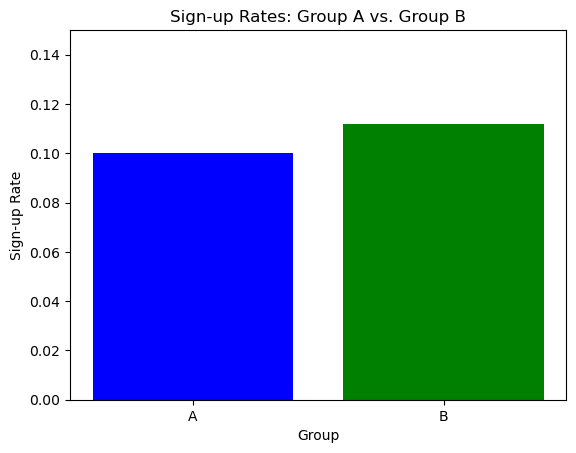

In [5]:
import matplotlib.pyplot as plt

# Plot sign-up rates
plt.bar(signup_rates.index, signup_rates.values, color=["blue", "green"])
plt.title("Sign-up Rates: Group A vs. Group B")
plt.xlabel("Group")
plt.ylabel("Sign-up Rate")
plt.ylim(0, 0.15)
plt.show()